In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
plt.style.use('fivethirtyeight')
import plotly.express as px

In [8]:
!pip install fredapi


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pd.set_option('display.max_column', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
from fredapi import Fred

In [5]:
fred_key = '9dd6725a1e918e5e97d11dfbdbcb82ca'

In [6]:
fred = Fred(api_key=fred_key)

In [33]:
sp_search = fred.search('S&P', order_by=y='popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-09-06   2024-09-06   
CSUSHPINSA          CSUSHPINSA     2024-09-06   2024-09-06   
SP500                    SP500     2024-09-06   2024-09-06   
MEHOINUSA672N    MEHOINUSA672N     2024-09-06   2024-09-06   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-09-06   2024-09-06   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-09-05  Daily, Close   
CSUSHPINSA            1987-01-01      2024-06-01       Monthly   
SP500                 2014-09-08      2024-09-06  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-09-05  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-09-06 09:06:11-05:00   
CSUSHPINSA                           NSA  2024-08-27 08:12:01-05:00   
SP500                                NSA  2024-09-06 19:11:01-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-09-06 09:06:14-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [9]:
sp500 = fred.get_series(series_id='SP500')
sp500

2014-09-08    2001.54
2014-09-09    1988.44
2014-09-10    1995.69
2014-09-11    1997.45
2014-09-12    1985.54
               ...   
2024-09-02        NaN
2024-09-03    5528.93
2024-09-04    5520.07
2024-09-05    5503.41
2024-09-06    5408.42
Length: 2610, dtype: float64

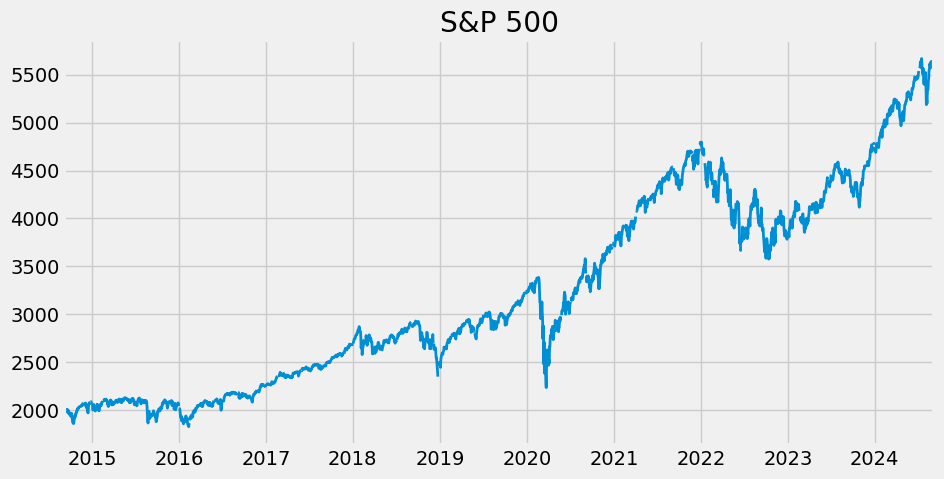

In [10]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [11]:
# Pull and join multiple data series

In [12]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [13]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-09-08   2024-09-08   
LNS14000006            LNS14000006     2024-09-08   2024-09-08   
CAUR                          CAUR     2024-09-08   2024-09-08   
TXUR                          TXUR     2024-09-08   2024-09-08   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-09-08   2024-09-08   
...                            ...            ...          ...   
LNS14000026            LNS14000026     2024-09-08   2024-09-08   
LNS14000048            LNS14000048     2024-09-08   2024-09-08   
LNS14000089            LNS14000089     2024-09-08   2024-09-08   
M08311USM156SNBR  M08311USM156SNBR     2024-09-08   2024-09-08   
LNS14000150            LNS14000150     2024-09-08   2024-09-08   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000026               Unemployment Rate - 20 Yrs. & over, Women   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-08-01   Monthly               M   
LNS14000006             1972-01-01      2024-08-01   Monthly               M   
CAUR                    1976-01-01      2024-07-01   Monthly               M   
TXUR                    1976-01-01      2024-07-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000026             1948-01-01      2024-08-01   Monthly               M   
LNS14000048             1948-01-01      2024-08-01   Monthly               M   
LNS14000089             1948-01-01      2024-08-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-08-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000026       Percent           %  Seasonally Adjusted   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-09-06 07:46:02-05:00   
LNS14000006                             SA  2024-09-06 07:46:16-05:00   
CAUR                                    SA  2024-08-20 12:36:01-05:00   
TXUR                                

In [14]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    # time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [16]:
uemp_results

UNRATE  LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01     NaN          NaN   NaN   NaN              0.69          NaN   
1929-05-01     NaN          NaN   NaN   NaN              1.65          NaN   
1929-06-01     NaN          NaN   NaN   NaN              2.06          NaN   
1929-07-01     NaN          NaN   NaN   NaN              0.79          NaN   
1929-08-01     NaN          NaN   NaN   NaN              0.04          NaN   
...            ...          ...   ...   ...               ...          ...   
2024-04-01     3.9          5.6   5.3   4.0               NaN          3.5   
2024-05-01     4.0          6.1   5.2   4.0               NaN          3.6   
2024-06-01     4.1          6.3   5.2   4.0               NaN          3.7   
2024-07-01     4.3          6.3   5.2   4.1               NaN          3.9   
2024-08-01     4.2          6.1   NaN   NaN               NaN          3.8   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1929-04-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-05-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-06-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-07-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-08-01          NaN               NaN   NaN     NaN   NaN          NaN   
...                 ...               ...   ...     ...   ...          ...   
2024-04-01          5.2               NaN   4.2     1.9   3.3          3.8   
2024-05-01          6.4               NaN   4.2     1.9   3.3          3.7   
2024-06-01          6.1               NaN   4.2     1.9   3.3          4.0   
2024-07-01          6.6               NaN   4.3     2.1   3.3          4.1   
2024-08-01          5.9               NaN   NaN     2.0   NaN          4.1   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1929-04-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-05-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-06-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-07-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-08-01          NaN          NaN   NaN   NaN          NaN          NaN   
...                 ...          ...   ...   ...          ...          ...   
2024-04-01          4.8          3.5   3.4   4.0          3.9          4.0   
2024-05-01          5.0          3.5   3.4   4.2          4.2          4.3   
2024-06-01          4.9          3.5   3.4   4.4          4.1          4.2   
2024-07-01          5.3          3.8   3.4   4.5          4.4          4.6   
2024-08-01          5.5          3.8   NaN   NaN          4.4          4.0   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1929-04-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
...          ...          ...   ...          ...   ...   ...   ...   ...   
2024-04-01   3.9          2.2   3.1          8.2   2.9   3.5   4.8   4.7   
2024-05-01   3.9          2.1   3.0          9.2   3.0   3.6   4.9   4.6   
2024-06-01   4.1          2.4   2.9          8.9   3.2   3.6   5.0   4.6   
2024-07-01   4.4          2.3   2.8          9.1   3.5   3.7   5.2   4.7   
2024-08-01   NaN          2.5   NaN          9.7   NaN   NaN   NaN   NaN   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN     

In [47]:
cols_to_drop = []
for i in uemp_results:
    if len(i)>4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis = 1)

In [48]:
uemp_results

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5   4.8   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6   4.9   
2024-06-01   5.2   4.0   4.2   3.3   3.4   4.4   4.1   2.9   3.2   3.6   5.0   
2024-07-01   5.2   4.1   4.3   3.3   3.4   4.5   4.4   2.8   3.5   3.7   5.2   
2024-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-04-01   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   2.7   3.1   
2024-05-01   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   2.8   3.0   
2024-06-01   4.6   3.3   3.8   3.3   2.9   2.7   4.6   3.6   3.9   2.9   3.0   
2024-07-01   4.7   3.4   3.9   3.4   3.0   2.7   4.7   3.9   4.0   3.2   3.0   
2024-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-04-01   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   2.8   2.8   
2024-05-01   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   2.8   2.9   
2024-06-01   4.8   2.8   4.1   4.1   5.2   3.3   3.4   3.7   4.5   2.8   3.0   
2024-07-01   4.9   2.8   4.1   4.2   5.4   3.3   3.5   3.8   4.5   2.8   3.2   
2024-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-04-01   5.8   3.6   4.3   3.1   2.0   3.1   5.2   2.8   3.1   2.5   4.4   
2024-05-01   5.8   3.7   4.1   3.0   2.0   3.1   5.3   2.8   3.0   2.5   4.3   
2024-06-01   5.8   3.8   4.0   2.9   2.1   3.1   5.4   2.8   2.8   2.6   3.9   
2024-07-01   5.8   4.0   3.9   2.9   2.2   3.1   5.5   2.7   2.8   2.6   3.6   
2024-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN

In [69]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [70]:
uemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-03-01       3.9      3.0            2.9             3.5       4.8   
2024-04-01       3.9      3.1            2.9             3.5       4.8   
2024-05-01       3.9      3.0            3.0             3.6       4.9   
2024-06-01       4.1      2.9            3.2             3.6       5.0   
2024-07-01       4.4      2.8            3.5             3.7       5.2   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-03-01         4.8      3.1       3.7      3.8        3.0       2.9   
2024-04-01         4.7      3.1       3.7      3.6        2.9       2.8   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   
2024-06-01         4.6      3.3       3.8      3.3        2.9       2.7   
2024-07-01         4.7      3.4       3.9      3.4        3.0       2.7   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-03-01       4.5             3.1         3.8        2.7        3.2   
2024-04-01       4.6             3.2         3.8        2.7        3.1   
2024-05-01       4.6             3.4         3.8        2.8        3.0   
2024-06-01       4.6             3.6         3.9        2.9        3.0   
2024-07-01       4.7             3.9         4.0        3.2        3.0   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

In [71]:
px.line(uemp_states)

Pull April 2020 Unemployment Rate Per State

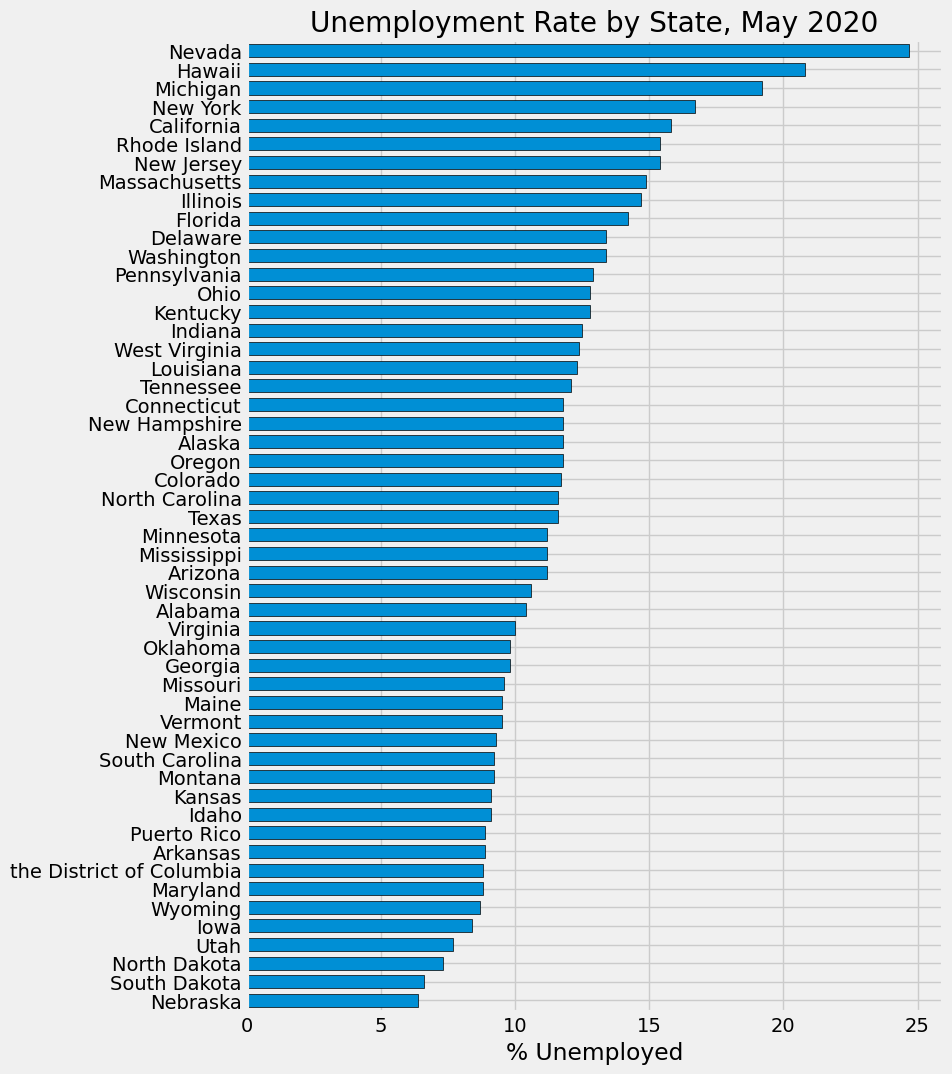

In [74]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

Pull Participation Rate

In [76]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-09-08   2024-09-08   
LNS11300060          LNS11300060     2024-09-08   2024-09-08   
LNS11300002          LNS11300002     2024-09-08   2024-09-08   
LNS11300001          LNS11300001     2024-09-08   2024-09-08   
LNS11324230          LNS11324230     2024-09-08   2024-09-08   
...                          ...            ...          ...   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-09-08   2024-09-08   
LRIN64MAUSM156S  LRIN64MAUSM156S     2024-09-08   2024-09-08   
LRIN64FEUSM156S  LRIN64FEUSM156S     2024-09-08   2024-09-08   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-09-08   2024-09-08   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-09-08   2024-09-08   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-08-01   Monthly               M   
LNS11300060            1948-01-01      2024-08-01   Monthly               M   
LNS11300002            1948-01-01      2024-08-01   Monthly               M   
LNS11300001            1948-01-01      2024-08-01   Monthly               M   
LNS11324230            1948-01-01      2024-08-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74MAUSM156S        1981-01-01      2024-07-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-07-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                                              
CIVPART                                SA  2024-09-06 07:47:02-05:00   
LNS11300060                            SA  2024-09-06 07:47:04-05:00   
LNS11300002                            SA  2024-09-06 07:47:05-05:00   
LNS11300001                            SA  2024-09-06 07:47:06-05:00   
LNS11324230                     

In [78]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Plot Unemployment vs Participation for each state!

In [79]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

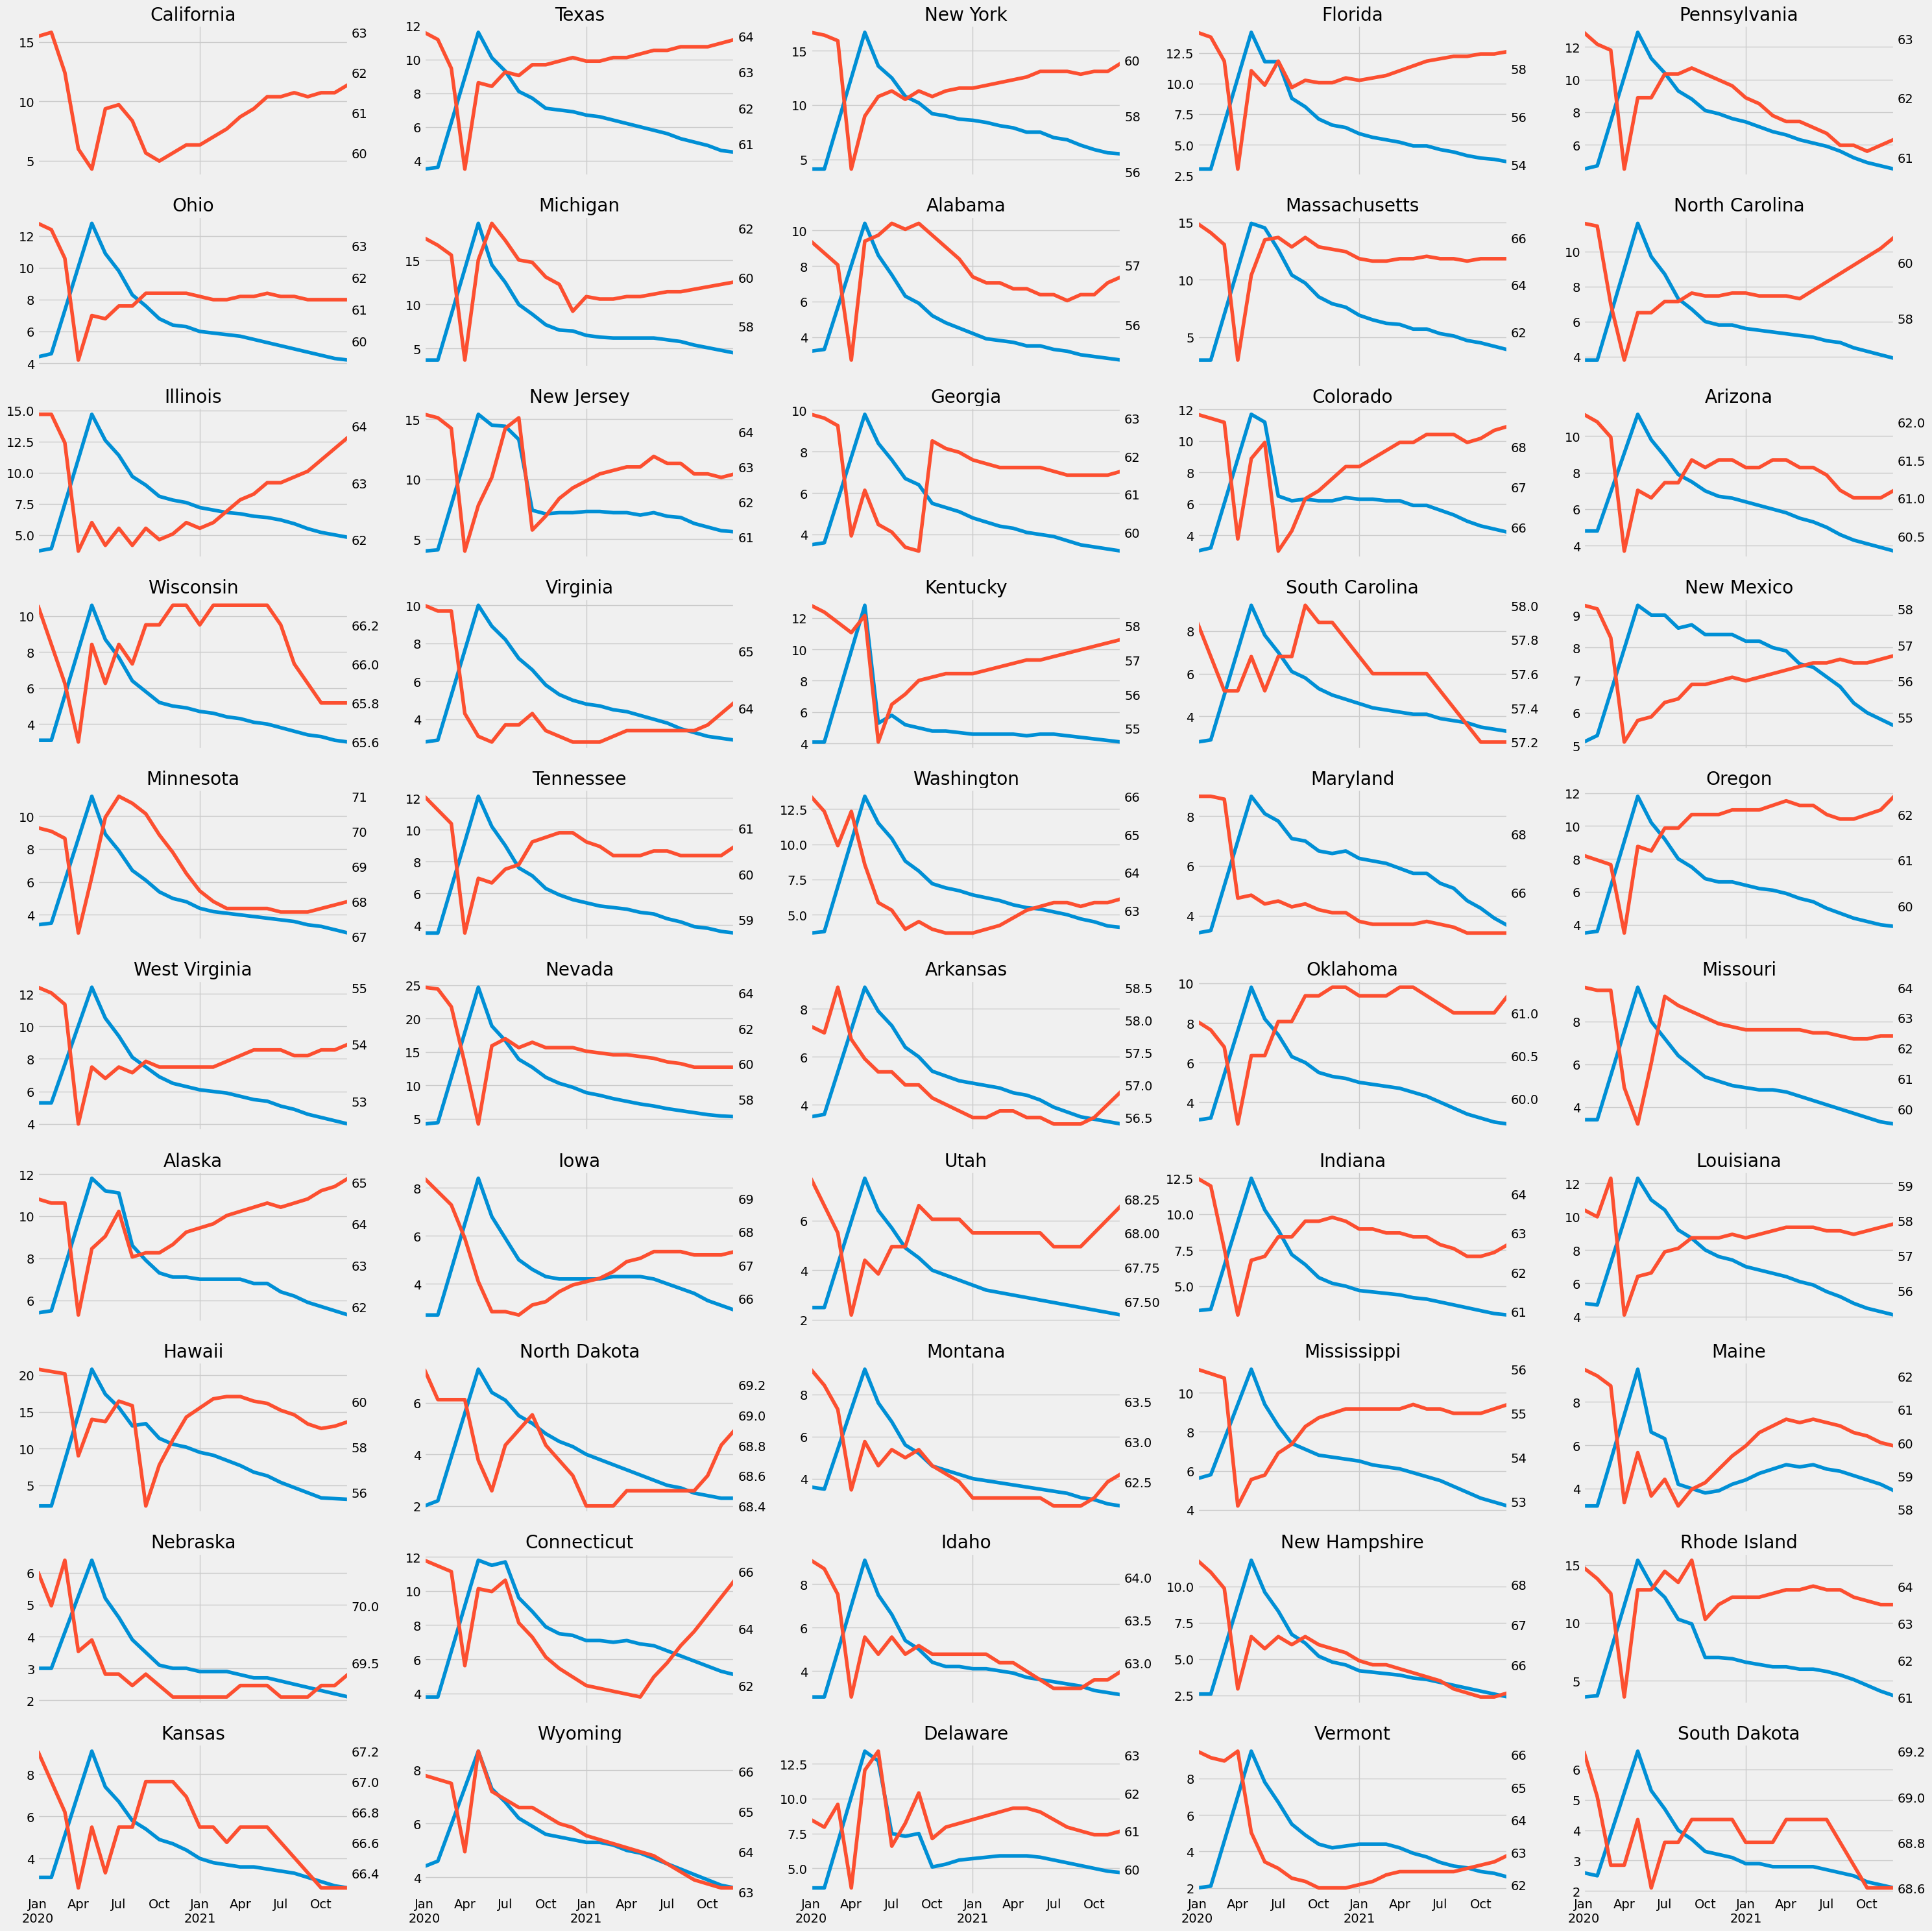

In [80]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()


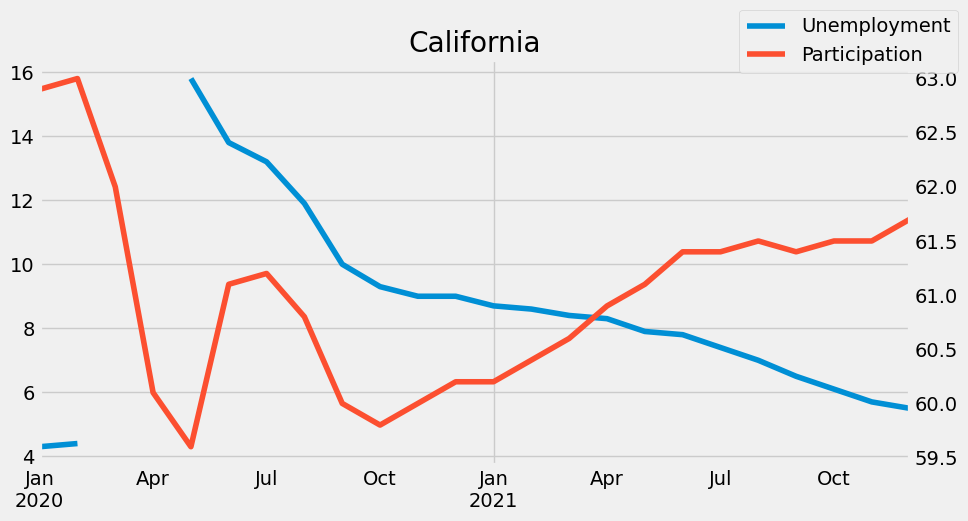

In [81]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()